<a href="https://www.kaggle.com/code/marinagrabelli/orthopedic-machine-learning-exercise?scriptVersionId=179424066" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


column-2c-wekacsv
weka-3-c



**Analisis exploratorio de datos**

In [2]:


data = pd.read_csv('/kaggle/input/column-2c-wekacsv/column_2C_weka.csv')



In [3]:
data.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info

<bound method DataFrame.info of      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
0       40.475232      98.672917                 -0.254400  Abnormal

In [5]:
data.shape

(310, 7)

In [6]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [7]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

Este dataset esta relacionado con el estudio de la columna vertebral y las patologías asociadas. Las columnas proporcionan información sobre la forma y orientación de la pelvis y la columna lumbar, así como el grado de espondilolistesis
La espondilolistesis es una condición en la cual una vértebra se desliza hacia adelante sobre la vértebra debajo de ella.

El grado de deslizamiento se utiliza para clasificar la espondilolistesis y se mide como un porcentaje del ancho del cuerpo vertebral. Por ejemplo, la espondilolistesis de grado I representa aproximadamente el 75% de todos los casos y se considera de baja gravedad.

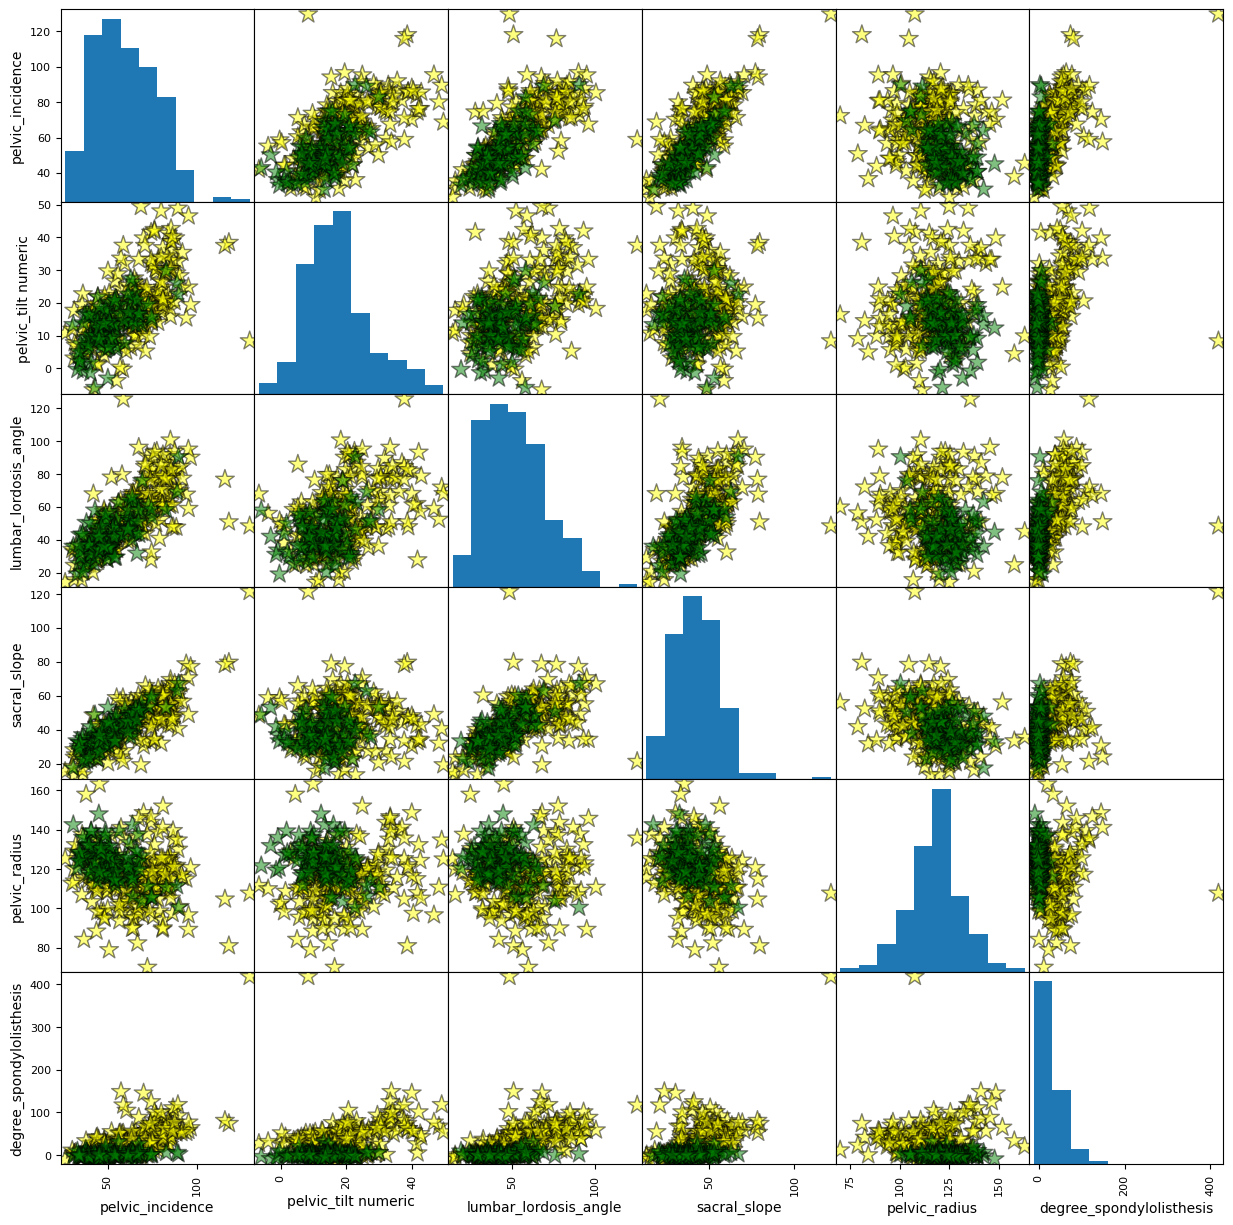

In [8]:
colores=['yellow' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]


pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=colores,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

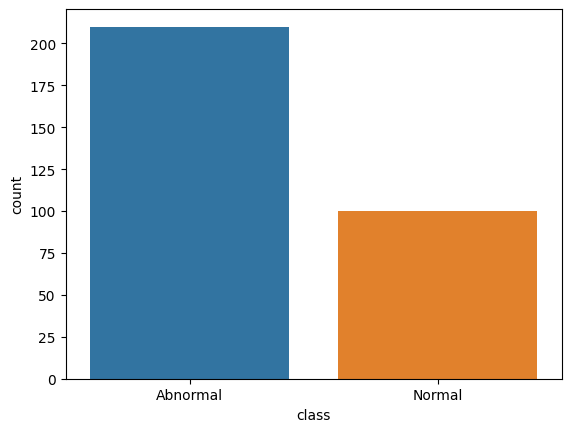

In [9]:
sns.countplot(x='class',data=data)
data.loc[:,'class'].value_counts()

In [10]:

knn=KNeighborsClassifier(n_neighbors=3)
x,y=data.loc[:,data.columns!='class'],data.loc[:,'class']
knn.fit(x,y)
prediction=knn.predict(x)

print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

 Este código implementa el algoritmo KNN para clasificar datos en conjuntos de entrenamiento y prueba, entrena el modelo en los datos de entrenamiento y evalúa su rendimiento en los datos de prueba.
 KNN es un algoritmo de clasificacion

In [11]:


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


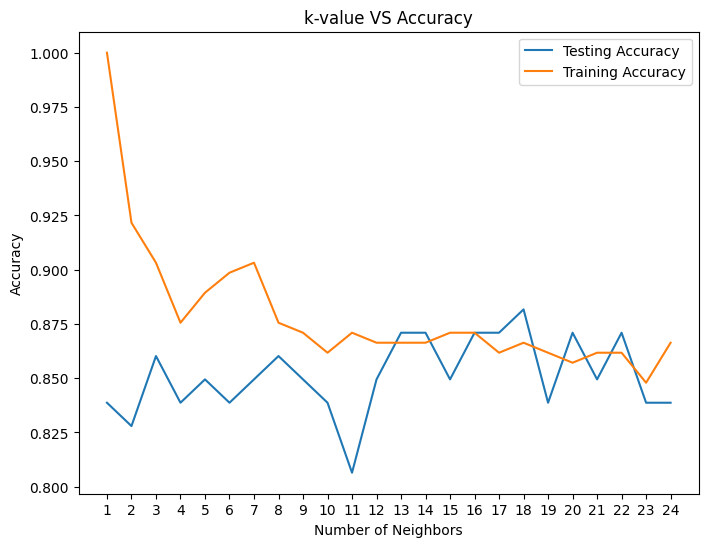

Best accuracy is 0.8817204301075269 with K = 18


In [12]:

#Primero, se crea un arreglo neig que contiene los valores del número de vecinos, desde 1 hasta 24.
neig = np.arange(1, 25)
#Se inicializan dos listas vacías, train_accuracy y test_accuracy, para almacenar las precisión del entrenamiento y la prueba respectivamente.
#Luego, se itera sobre cada valor de neig utilizando un bucle for.
train_accuracy = []
test_accuracy = []
#Dentro del bucle, se crea un clasificador KNN con el número de vecinos actual y se ajusta a los datos de entrenamiento (x_train y y_train).
#Se calcula la precisión del entrenamiento y se agrega a la lista train_accuracy.
#Se calcula la precisión de la prueba y se agrega a la lista test_accuracy.
for k in neig:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    #Después del bucle, se traza un gráfico con los valores de neig en el eje x y las precisión del entrenamiento y la prueba en los ejes y.
#Finalmente, se encuentra la mejor precisión de la prueba y se obtiene el valor correspondiente de k.
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[8, 6])
plt.plot(neig, test_accuracy, label='Testing Accuracy')
plt.plot(neig, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('k-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()

best_accuracy = np.max(test_accuracy)
best_k = 1 + test_accuracy.index(best_accuracy)
print("Best accuracy is {} with K = {}".format(best_accuracy, best_k))


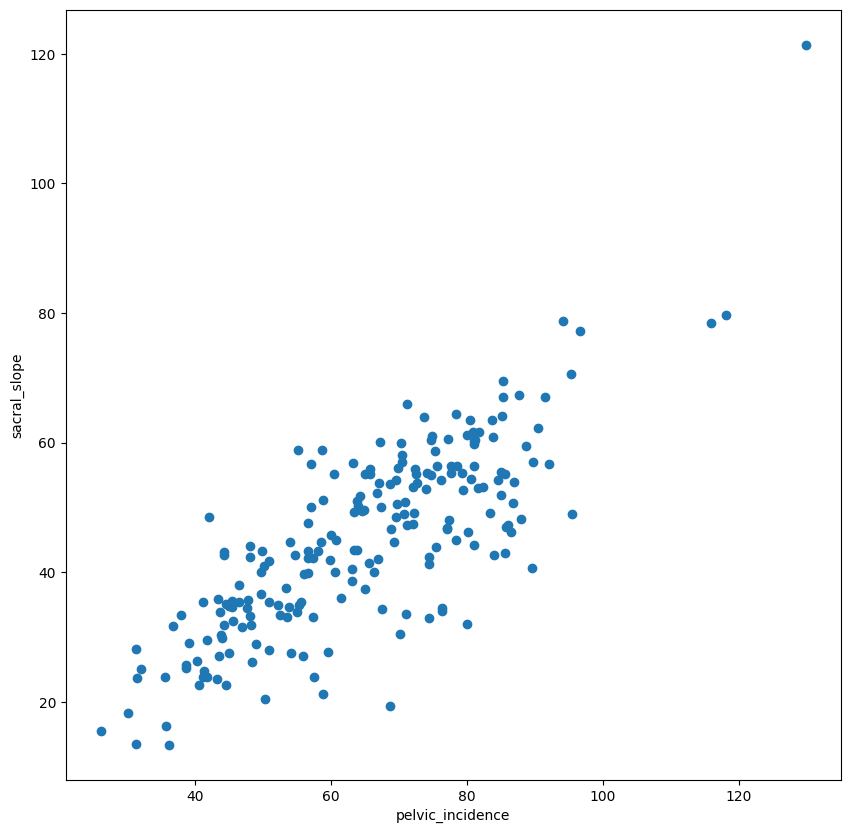

In [13]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [14]:
y_mapeado=data['class'].map({'Normal':0,'Abnormal':1})
X = data.drop('class', axis=1)

In [15]:


X_train, X_test, y_train, y_test = train_test_split(X, y_mapeado, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7741935483870968


La regresión lineal es una técnica de análisis de datos que se utiliza para predecir el valor de una variable desconocida utilizando otra variable relacionada y conocida. Modela matemáticamente la variable desconocida o dependiente y la variable conocida o independiente como una ecuación lineal.

En términos más simples, la regresión lineal busca encontrar la mejor línea recta que se ajuste a los datos observados. Esta línea recta se utiliza para predecir los valores de la variable dependiente en función de los valores de la variable independiente

R^2 score:  0.6458410481075871


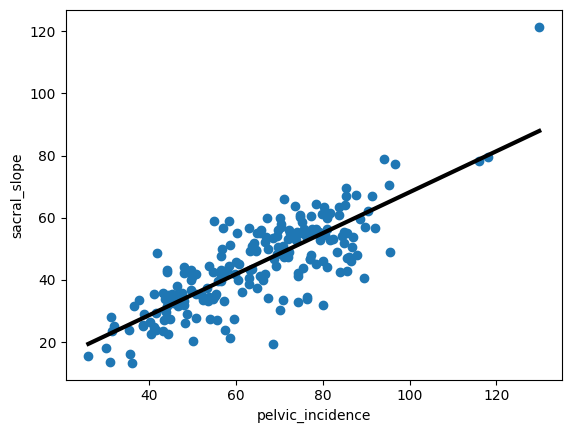

In [16]:
# LinearRegression

reg = LinearRegression()
#La función linspace de NumPy crea una secuencia de valores igualmente espaciados en un intervalo dado.

predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

CROSS VALIDATION
La validación cruzada es especialmente útil cuando se dispone de un conjunto de datos limitado. En lugar de dividir los datos en un único conjunto de entrenamiento y un único conjunto de prueba, la validación cruzada divide los datos en múltiples subconjuntos llamados "folds". Luego, se entrena y evalúa el modelo en diferentes combinaciones de estos subconjuntos.

El proceso general de la validación cruzada implica lo siguiente:

Se divide el conjunto de datos en K subconjuntos o folds.
Se entrena el modelo K veces, utilizando K-1 folds como conjunto de entrenamiento y el fold restante como conjunto de prueba.
Se evalúa el rendimiento del modelo en cada iteración utilizando una métrica de evaluación, como la precisión o el error.
Se calcula el promedio de las métricas de evaluación obtenidas en las K iteraciones para obtener una estimación general del rendimiento del modelo.

La validación cruzada ayuda a evaluar cómo se comportará un modelo en datos no vistos y a detectar problemas como el sobreajuste (overfitting) o el subajuste (underfitting). Además, permite utilizar de manera más eficiente un conjunto de datos limitado al utilizar todos los datos tanto para entrenar como para evaluar el modelo.

En resumen, la validación cruzada es una técnica utilizada en el aprendizaje automático para evaluar el rendimiento y la confiabilidad de

In [17]:
# CV
reg=LinearRegression()
k=5 #numero de folds
cv_result=cross_val_score(reg,x,y,cv=k)


#cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
#promedio 
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.3931462502884869


La regresión regularizada es especialmente útil cuando se trabaja con conjuntos de datos que tienen muchas variables independientes o cuando existe una alta correlación entre las variables independientes. Ayuda a evitar el sobreajuste y mejora la capacidad de generalización del modelo.
Consiste en agregar un término de regularización a la función de costo del modelo, lo que penaliza los coeficientes de las variables independientes y ayuda a evitar que tomen valores excesivamente grandes.

Existen dos tipos comunes de regresión regularizada: la regresión de Ridge (Ridge Regression) y la regresión de Lasso (Lasso Regression).

La regresión de Ridge agrega un término de penalización a la función de costo que es proporcional al cuadrado de los coeficientes de las variables independientes. Esto tiene el efecto de reducir los coeficientes hacia cero, pero no los hace exactamente cero. La regresión de Ridge es útil cuando se desea mantener todas las variables en el modelo, pero se quiere reducir su influencia.
La regresión de Lasso agrega un término de penalización a la función de costo que es proporcional al valor absoluto de los coeficientes de las variables independientes. Esto tiene el efecto de reducir algunos coeficientes a cero, lo que significa que algunas variables pueden ser excluidas del modelo. La regresión de Lasso es útil cuando se desea realizar una selección automática de características y reducir la dimensionalidad del modelo.

In [18]:
#ridge

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.5732611808361024


In [19]:
# Lasso

x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9999985469460118
Lasso coefficients:  [ 9.98901381e-01 -9.98137804e-01  3.13359061e-05 -0.00000000e+00]


l código ajusta un modelo de regresión lineal utilizando la regresión de Lasso con regularización L1. Divide los datos en conjuntos de entrenamiento y prueba, ajusta el modelo en el conjunto de entrenamiento y evalúa su rendimiento en el conjunto de prueba.

In [20]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



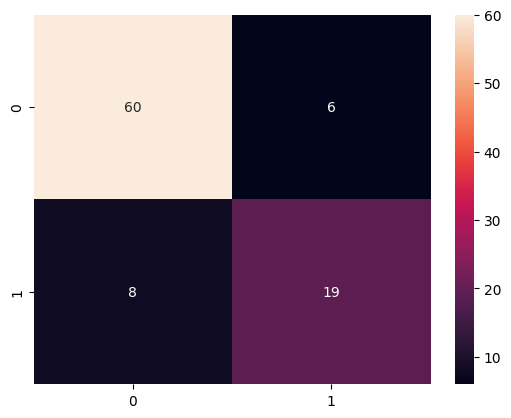

In [21]:
# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

La curva ROC muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) del modelo. El TPR representa la proporción de ejemplos positivos que se clasifican correctamente, mientras que el FPR representa la proporción de ejemplos negativos que se clasifican incorrectamente como positivos.
El área bajo la curva ROC (AUC) es una medida comúnmente utilizada para evaluar el rendimiento de un modelo de clasificación. Un AUC cercano a 1 indica un modelo con un buen poder de discriminación entre las clases, mientras que un AUC cercano a 0.5 indica un rendimiento similar al azar.

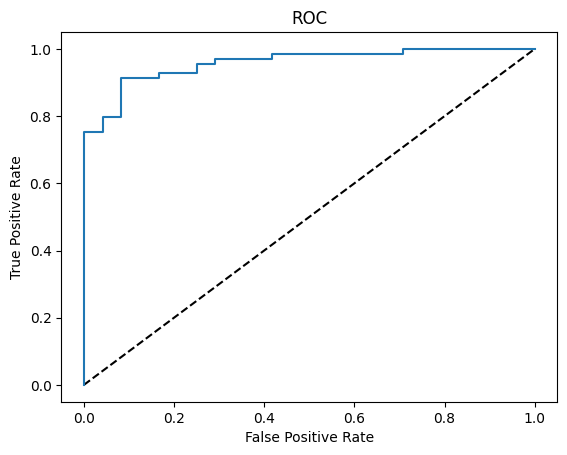

In [22]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [23]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 4}
Best score: 0.7559434901667911


La función get_dummies() en pandas se utiliza para convertir variables categóricas en variables numéricas binarias (0 o 1) mediante la técnica de codificación one-hot. Esta técnica es útil cuando se trabaja con algoritmos de aprendizaje automático que requieren variables numéricas como entrada

In [24]:
# Load data
data = pd.read_csv('/kaggle/input/column-2c-wekacsv/column_2C_weka.csv')
# get_dummies

df = pd.get_dummies(data)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,True,False
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,True,False
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,True,False
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,True,False
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,True,False
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,True,False
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,True,False
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,True,False
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,True,False
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,True,False


In [25]:
# drop one of the feature
df.drop("class_Normal",axis = 1, inplace = True) 
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,True
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,True
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,True
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,True
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,True
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,True
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,True
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,True
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,True
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,True


Support Vector Machines (SVM), preprocesamiento y pipelines en scikit-learn
Se definen los pasos del pipeline en una lista de tuplas. El primer paso es el preprocesamiento con StandardScaler, que estandariza las características. El segundo paso es el clasificador SVM (SVC)
Se definen los parámetros que se van a ajustar durante la búsqueda en cuadrícula. En este caso, se ajustan los parámetros C y gamma del clasificador SVM
Se dividen los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split. El parámetro test_size especifica el tamaño del conjunto de prueba (en este caso, el 20% de los datos).
Se utiliza la clase GridSearchCV para realizar una búsqueda en cuadrícula con validación cruzada. Se pasa el objeto pipeline, el diccionario de parámetros y el número de pliegues de validación cruzada como argumentos. Luego, se llama al método fit para realizar la búsqueda en cuadrícula
Se utilizan las mejores estimaciones encontradas durante la búsqueda en cuadrícula para hacer predicciones en el conjunto de prueb

In [26]:
# SVM, pre-process and pipeline

steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


**Grafico de dispersion aprendizaje no supervisado**

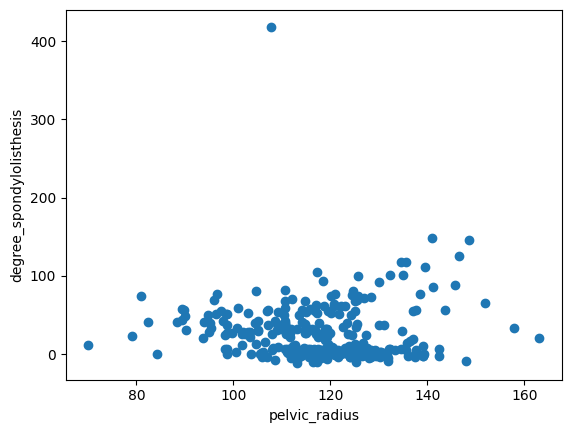

In [27]:
# As you can see there is no labels in data
data = pd.read_csv('/kaggle/input/column-2c-wekacsv/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

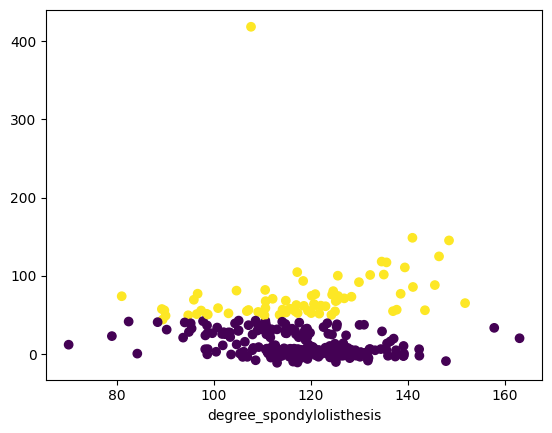

In [28]:
# KMeans Clustering
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]

kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

La tabla de tabulación cruzada proporciona una visión general de la distribución de los datos en los clusters y puede ayudar a identificar patrones o relaciones entre las variables y los clusters. Es una herramienta útil para evaluar la calidad del clustering y comprender la estructura de los datos. En la siguiente tabla se observa que hay dos clusters (0 y 1) y se muestra la cantidad de pacientes anormales y normales en cada cluster. En este caso, la mayoría de los pacientes en ambos clusters son anormales

cuando el número de clases de datos es desconocido, se puede utilizar el método del codo para determinar el número óptimo de clusters. Se busca un equilibrio entre una inercia baja y no tener demasiados clusters.
El método del codo consiste en graficar la inercia en función del número de clusters y buscar el "codo" en el gráfico. El codo representa el punto donde la inercia comienza a disminuir a un ritmo más lento. Este punto indica un equilibrio entre tener clusters más compactos y no tener demasiados clusters.

In [29]:
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


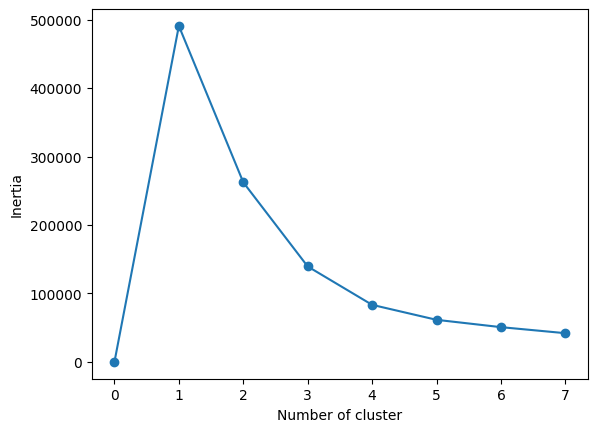

In [30]:
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [31]:
data = pd.read_csv('/kaggle/input/column-2c-wekacsv/column_2C_weka.csv')
data3 = data.drop('class',axis = 1)

In [32]:

scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             97      90
1            113      10


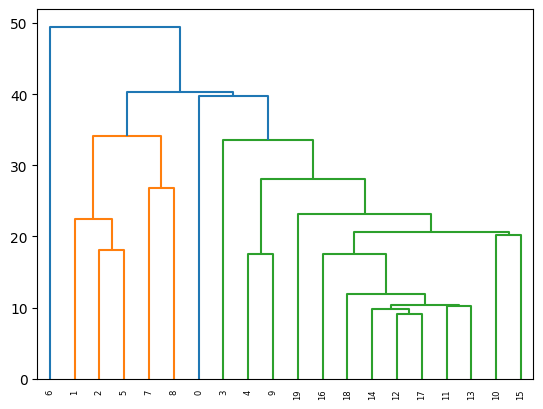

In [33]:


merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

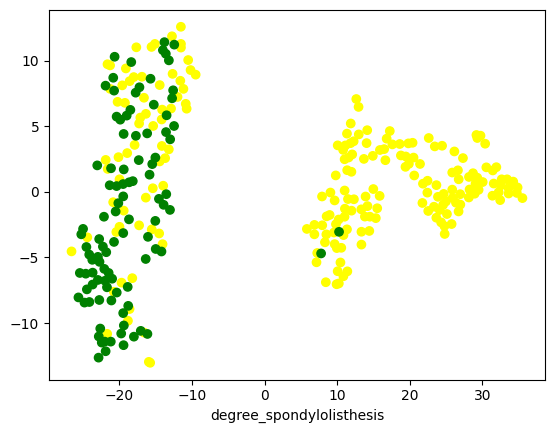

In [34]:

model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = colores )
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [35]:
# PCA

model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08929532e-11 -5.77350269e-01
  -3.59065555e-12  3.06732417e-12]]


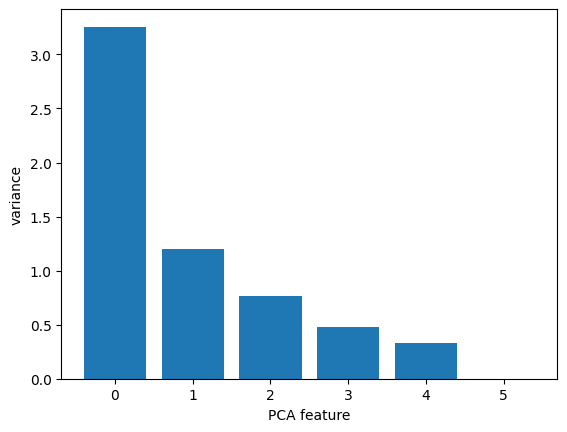

In [36]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

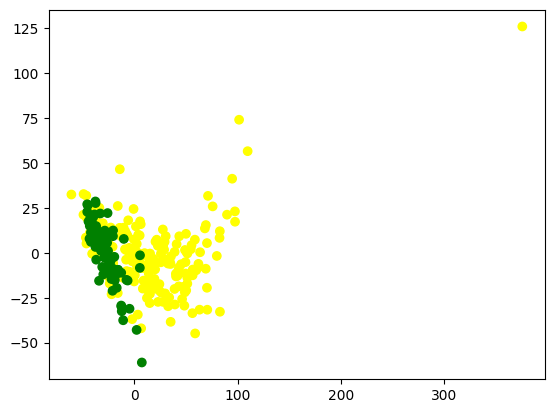

In [37]:
# apply PCA
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = colores)
plt.show()